In [18]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Download historical market data for FTSE50
dfNews = pd.read_excel("/Users/ttonny0326/Data_Project/Topic_Modelling/Result/BERTopic_bloomberg_result.xlsx")
dffin = yf.download('^FTSE', start='2023-06-23', end='2023-12-07')

# dfNews['Posted_Time'] = dfNews['Posted_Time'].dt.tz_localize('UTC')

[*********************100%***********************]  1 of 1 completed


In [15]:
# Convert the 'Date' column to datetime format
dfNews['Date'] = pd.to_datetime(dfNews['Date'], dayfirst=True)

# Merge the two DataFrames on the date columns
merged_data = pd.merge(dfNews, dffin, left_on='Date', right_on='Date', how='inner')

merged_data.head()

,Title,Sub_Title,Total_title,Author,Date,Content,processed_content,precessed_content_Len,Topic,Open,High,Low,Close,Adj Close,Volume
0,Five Takeaways From the Paris Summit to Fix Gl...,,Five Takeaways From the Paris Summit to Fix Gl...,Akshat Rathi and Natasha White+Follow,2023-06-23,After two days of talks overhauling the global...,two days talks overhauling global financial sy...,823,1,7502.0,7502.0,7439.700195,7461.899902,7461.899902,621489600
1,US Economy May Beat the Odds This Year and Dod...,,US Economy May Beat the Odds This Year and Dod...,Ben Holland+Follow,2023-06-23,"This is Washington Edition, the newsletter ab...",washington edition newsletter money power poli...,682,0,7502.0,7502.0,7439.700195,7461.899902,7461.899902,621489600
2,"Deluge Disrupts Copper Mines, Crops and Transp...",,"Deluge Disrupts Copper Mines, Crops and Transp...",James Attwood+Follow,2023-06-23,Central Chile’s first major rain storms this y...,central chile’s first major rain storms year l...,174,-1,7502.0,7502.0,7439.700195,7461.899902,7461.899902,621489600
3,Banks Hit by Worst Week Since May as Regulator...,,Banks Hit by Worst Week Since May as Regulator...,Matt Turner+Follow,2023-06-23,Bank stocks’ recovery from their swoon earlier...,bank stocks’ recovery swoon earlier year took ...,242,-1,7502.0,7502.0,7439.700195,7461.899902,7461.899902,621489600
4,Chinese Builder Halts All Offshore Debt Paymen...,,Chinese Builder Halts All Offshore Debt Paymen...,Jacob Gu+Follow,2023-06-23,A Hong Kong-listed Chinese real estate develop...,hong konglisted chinese real estate developer ...,238,0,7502.0,7502.0,7439.700195,7461.899902,7461.899902,621489600


In [16]:
merged_data.to_excel("merge_data.xlsx", index=False)

In [20]:
# 讀取有 Sentiment analysis 的資料

merged_data2 = pd.read_excel("/Users/ttonny0326/Data_Project/Topic_Modelling/Sentiment_bloomberg.xlsx")

/var/folders/x0/lc_8wd2j6b3d65l797160snm0000gn/T/ipykernel_82596/2116270698.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_data2.corr()


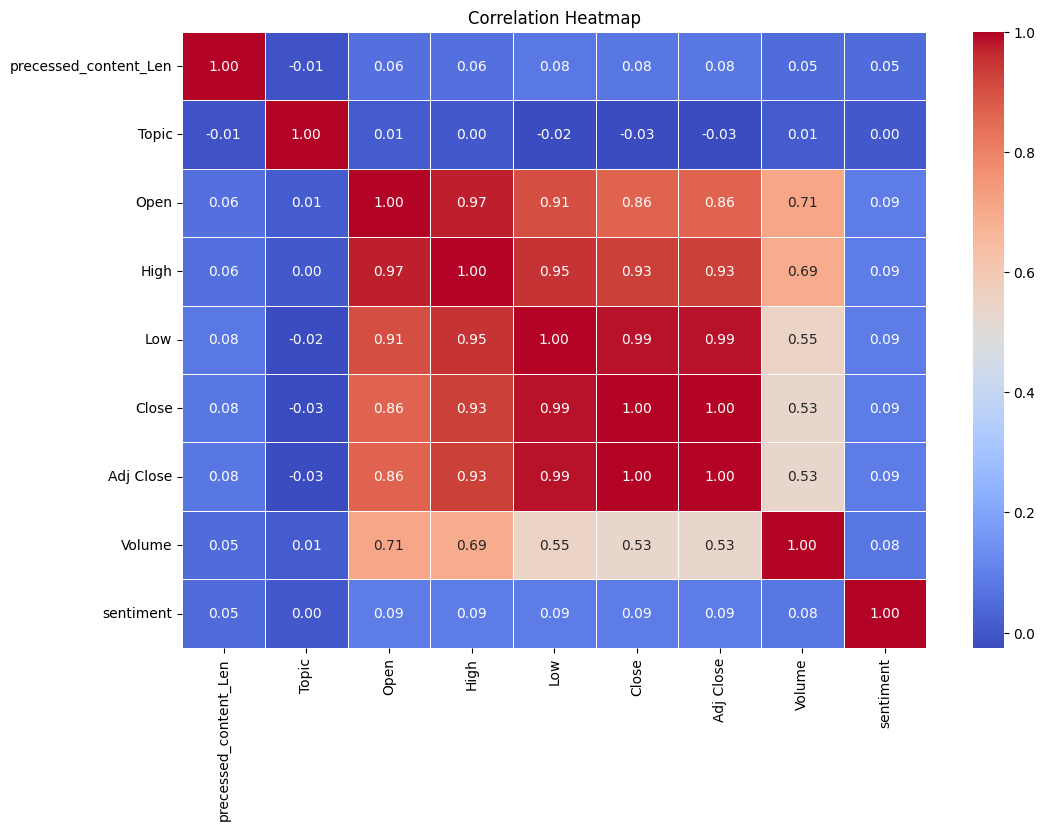

In [21]:
# Compute the correlation matrix
corr_matrix = merged_data2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()